Clustering based on samsung dataset

30 volunteers took part in the experiment, they performed 6 activities The smartphone measured data from the accelerometer and gyroscope in three dimensions (X, Y, Z). Each row is a time window. Columns are processed measurement data from the gyroscope and accelerometer. The length of one window is 2.56 seconds (128 samples, with a frequency of 50 Hz). This is how many rows were obtained (for 30 people performing six activities for different times)

More comments right down below :)

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

samsung_test = 'samsung_test.txt'
df1 = pd.read_csv(samsung_test, delim_whitespace=True)

print(df1)

      2.5717778e-001  -2.3285230e-002  -1.4653762e-002  -9.3840400e-001  \
0           0.286027        -0.013163        -0.119083        -0.975415   
1           0.275485        -0.026050        -0.118152        -0.993819   
2           0.270298        -0.032614        -0.117520        -0.994743   
3           0.274833        -0.027848        -0.129527        -0.993852   
4           0.279220        -0.018620        -0.113902        -0.994455   
...              ...              ...              ...              ...   
2941        0.310155        -0.053391        -0.099109        -0.287866   
2942        0.363385        -0.039214        -0.105915        -0.305388   
2943        0.349966         0.030077        -0.115788        -0.329638   
2944        0.237594         0.018467        -0.096499        -0.323114   
2945        0.153627        -0.018437        -0.137018        -0.330046   

      -9.2009078e-001  -6.6768331e-001  -9.5250112e-001  -9.2524867e-001  \
0           -0.967458  

In [4]:
samsung_test_labels = 'samsung_test_labels.txt'
df2 = pd.read_csv(samsung_test_labels, delim_whitespace=True)

print(df2)

      5
0     5
1     5
2     5
3     5
4     5
...  ..
2941  2
2942  2
2943  2
2944  2
2945  2

[2946 rows x 1 columns]


In [5]:
samsung_train_labels = 'samsung_train_labels.txt'
df3 = pd.read_csv(samsung_train_labels, delim_whitespace=True)

print(df3)

      5
0     5
1     5
2     5
3     5
4     5
...  ..
7346  2
7347  2
7348  2
7349  2
7350  2

[7351 rows x 1 columns]


In [6]:
samsung_train = 'samsung_train.txt'
df4 = pd.read_csv(samsung_train, delim_whitespace=True)

print(df4)

      2.8858451e-001  -2.0294171e-002  -1.3290514e-001  -9.9527860e-001  \
0           0.278419        -0.016411        -0.123520        -0.998245   
1           0.279653        -0.019467        -0.113462        -0.995380   
2           0.279174        -0.026201        -0.123283        -0.996091   
3           0.276629        -0.016570        -0.115362        -0.998139   
4           0.277199        -0.010098        -0.105137        -0.997335   
...              ...              ...              ...              ...   
7346        0.299665        -0.057193        -0.181233        -0.195387   
7347        0.273853        -0.007749        -0.147468        -0.235309   
7348        0.273387        -0.017011        -0.045022        -0.218218   
7349        0.289654        -0.018843        -0.158281        -0.219139   
7350        0.351503        -0.012423        -0.203867        -0.269270   

      -9.8311061e-001  -9.1352645e-001  -9.9511208e-001  -9.8318457e-001  \
0           -0.975300  

In [7]:
df1.info() #test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Columns: 561 entries, 2.5717778e-001 to -5.7978304e-002
dtypes: float64(561)
memory usage: 12.6 MB


In [8]:
df4.info() #train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Columns: 561 entries, 2.8858451e-001 to -5.8626924e-002
dtypes: float64(561)
memory usage: 31.5 MB


In [9]:
df1.describe()

,2.5717778e-001,-2.3285230e-002,-1.4653762e-002,-9.3840400e-001,-9.2009078e-001,-6.6768331e-001,-9.5250112e-001,-9.2524867e-001,-6.7430222e-001,-8.9408755e-001,...,7.1645446e-002,-3.3037044e-001,-7.0597388e-001,6.4624029e-003,1.6291982e-001,-8.2588562e-001,2.7115145e-001,-7.2000927e-001,2.7680104e-001,-5.7978304e-002
count,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,...,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,0.274002,-0.017862,-0.108418,-0.613525,-0.508190,-0.633786,-0.641172,-0.522539,-0.637026,-0.461916,...,0.130256,-0.277575,-0.598719,0.005264,0.003745,0.040323,-0.017395,-0.513853,0.074817,-0.048717
std,0.060580,0.025749,0.042720,0.412624,0.494295,0.362760,0.385222,0.479923,0.357814,0.523945,...,0.231055,0.317297,0.311089,0.336205,0.445143,0.634896,0.501368,0.509277,0.324334,0.241508
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262104,-0.024963,-0.121176,-0.990928,-0.973672,-0.976133,-0.992344,-0.974133,-0.975353,-0.934458,...,-0.008455,-0.517546,-0.829631,-0.130613,-0.282700,-0.517975,-0.428847,-0.829805,0.022108,-0.098528
50%,0.277114,-0.016963,-0.108468,-0.930822,-0.789987,-0.827735,-0.937542,-0.799734,-0.817009,-0.852659,...,0.142701,-0.310992,-0.683337,0.005177,0.006761,0.047190,-0.027134,-0.729649,0.181472,-0.010627
75%,0.288111,-0.010134,-0.097142,-0.267391,-0.105907,-0.311279,-0.321687,-0.133372,-0.322756,-0.009965,...,0.288342,-0.083389,-0.458306,0.146204,0.288358,0.622233,0.394518,-0.545860,0.259814,0.092617
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [10]:
df4.describe()

,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-7.4323027e-002,-2.9867637e-001,-7.1030407e-001,-1.1275434e-001,3.0400372e-002,-4.6476139e-001,-1.8445884e-002,-8.4124676e-001,1.7994061e-001,-5.8626924e-002
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,0.274486,-0.017695,-0.109138,-0.605385,-0.510873,-0.604712,-0.630463,-0.526845,-0.606107,-0.468541,...,0.125321,-0.307010,-0.625282,0.008700,0.002182,0.008790,-0.005979,-0.489499,0.058577,-0.056514
std,0.070266,0.040813,0.056638,0.448742,0.502649,0.418700,0.424080,0.485946,0.414133,0.544556,...,0.251000,0.321033,0.307603,0.336807,0.448337,0.608319,0.478008,0.511825,0.297497,0.279141
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262974,-0.024863,-0.120990,-0.992750,-0.978117,-0.980246,-0.993589,-0.978153,-0.980252,-0.936219,...,-0.023457,-0.542677,-0.845576,-0.121533,-0.289587,-0.482309,-0.376382,-0.812017,-0.017991,-0.143511
50%,0.277193,-0.017219,-0.108675,-0.946139,-0.851795,-0.859273,-0.950673,-0.856916,-0.857042,-0.881635,...,0.134060,-0.343698,-0.711726,0.009522,0.008859,0.008741,-0.000213,-0.709396,0.182096,0.003201
75%,0.288449,-0.010781,-0.097793,-0.242725,-0.034219,-0.262290,-0.292672,-0.066683,-0.265598,-0.017129,...,0.289106,-0.126961,-0.503852,0.150935,0.292905,0.506204,0.359381,-0.508973,0.248356,0.107699
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


Division into training and test data is unnecessary considering clustering. The description of the data shows that they were randomly divided into training and test, so there is nothing to prevent combining the sets.

In [14]:
columns_df1 = set(df1.columns)
columns_df4 = set(df4.columns)

print("Columns only in df1:", columns_df1 - columns_df4)
print("Columns only in df4:", columns_df4 - columns_df1)
print("Common columns:", columns_df1 & columns_df4)


Columns only in df1: {'-6.8679745e-001', '-9.5804876e-001', '-1.7151642e-001', '6.4624029e-003', '-9.9620895e-001', '-9.9589361e-001', '-9.9667757e-001', '3.5852150e-002', '4.2297454e-001', '-7.6448457e-001', '-9.9243025e-001', '1.1116947e-002', '-2.3481529e-001', '-9.5250112e-001', '-9.8730333e-001', '-7.8267232e-001', '-3.4559715e-001', '-3.2343727e-001', '-9.3434525e-001', '-8.9461236e-001', '-9.3701413e-001', '-4.3183892e-001', '4.5754401e-002', '-9.9597690e-001', '3.2000000e-001', '-9.9503609e-001', '-1.4653762e-002', '-6.6341057e-001', '-7.9546772e-001', '-8.8819740e-001', '-9.2542727e-001', '-9.3103448e-001', '-9.8411445e-001', '-8.2588562e-001', '7.8131389e-001', '1.1997616e-001', '-6.7430222e-001', '-9.2519489e-001', '-9.7501109e-001', '-9.9449682e-001', '-9.4088123e-001', '-8.9802151e-001', '-9.9532347e-001', '-9.1850969e-001', '-9.3840400e-001', '-5.7978304e-002', '-4.3025357e-001', '7.1720847e-001', '-8.5780102e-001', '-9.3654081e-001', '4.3277380e-001', '-8.6692938e-001.3'

In [15]:
columns_df1 = set(df1.columns)
columns_df4 = set(df4.columns)

unique_to_df1 = columns_df1 - columns_df4
unique_to_df4 = columns_df4 - columns_df1

for col in unique_to_df4:
    df1[col] = df4[col].median()

for col in unique_to_df1:
    df4[col] = df1[col].median()

combined_df = pd.concat([df1, df4], axis=0, ignore_index=True)

print("Size of connected table: ", combined_df.shape)

Size of connected table:  (10297, 1113)


In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_df)

scaled_df = pd.DataFrame(scaled_data, columns=combined_df.columns)

print("Size of scaled table: ", scaled_df.shape)

Size of scaled table:  (10297, 1113)


In [17]:
kmeans = KMeans(n_clusters=6, random_state=42)

kmeans_labels = kmeans.fit_predict(scaled_data)
combined_df['KMeans_Cluster'] = kmeans_labels

print(combined_df['KMeans_Cluster'].value_counts())

KMeans_Cluster
0    2538
1    2371
3    1984
2    1377
5    1105
4     922
Name: count, dtype: int64


In [18]:
dbscan = DBSCAN(eps=0.05, min_samples=10)

dbscan_labels = dbscan.fit_predict(scaled_data)
combined_df['DBSCAN_Cluster'] = dbscan_labels

print(combined_df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1    10297
Name: count, dtype: int64


In [19]:
pca = PCA(n_components=2)
scaled_data_2d = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_data_2d)

dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(scaled_data_2d)

DBSCAN(eps=0.05, min_samples=10)

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

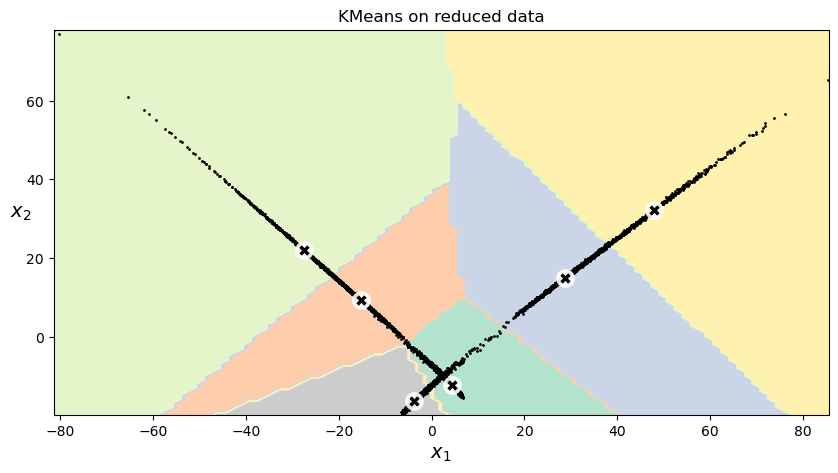

In [21]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(kmeans, scaled_data_2d)
plt.title("KMeans on reduced data")
plt.show()

I chose 6 for the number of clusters because there are 6 activities. I will check below whether the data is actually arranged in 6 groups.

In [23]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(scaled_data)
    for k in range(2, 20)
]

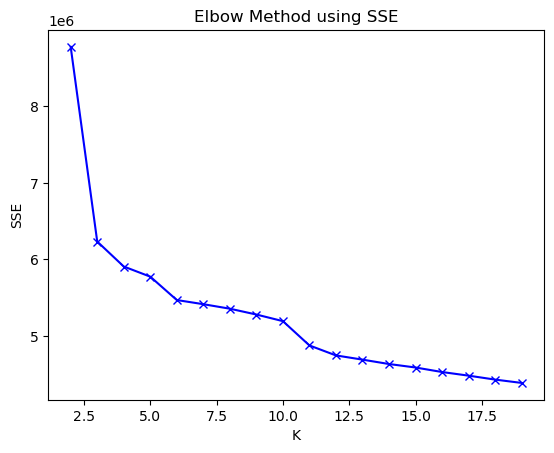

In [24]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [25]:
silhouette_scores = [
    silhouette_score(scaled_data, model.labels_)
    for model in kmeans_per_k
]

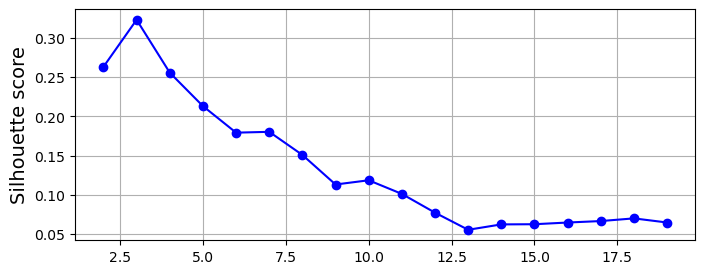

In [26]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

The results show that we can have 3 or 6 classes. Our goal is to classify activities so i leave 6 clusters.

In [28]:
def plot_dbscan(dbscan_labels, scaled_data, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = scaled_data[anomalies_mask]
    non_cores = scaled_data[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

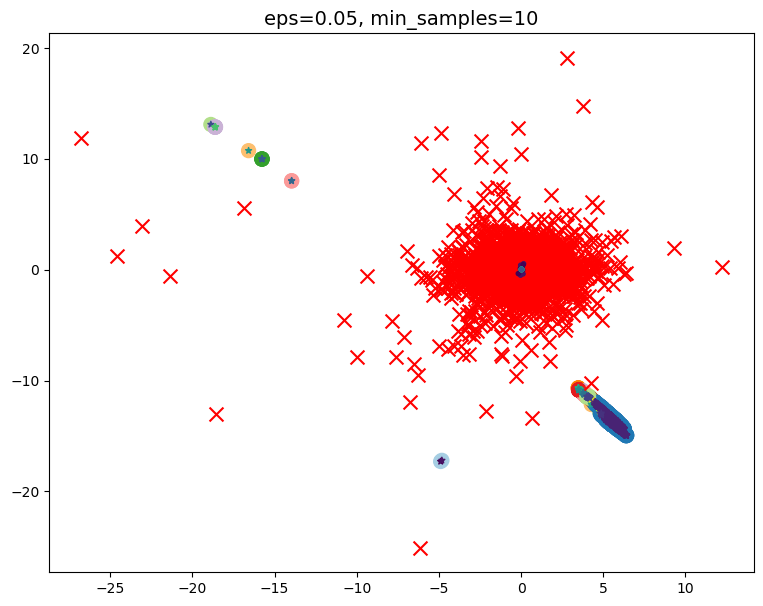

In [29]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan_labels, scaled_data, size=100)

plt.show()

In [30]:
dbscan = DBSCAN(eps=0.2, min_samples=10)

dbscan_labels_2 = dbscan.fit_predict(scaled_data)
combined_df['DBSCAN_Cluster'] = dbscan_labels_2

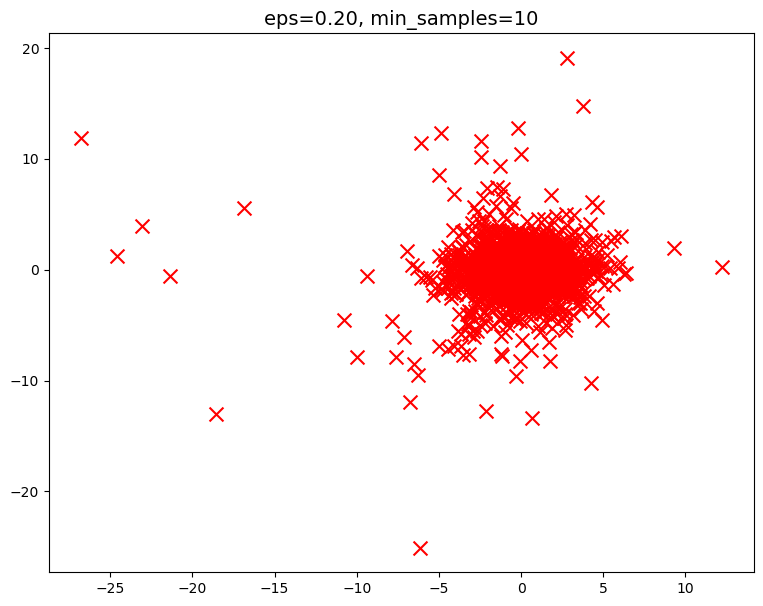

In [31]:
plt.figure(figsize=(20, 7))

plt.subplot(122)
plot_dbscan(dbscan_labels_2, scaled_data, size=600)

plt.show()

From these graphs i can conclude that are outliers and the largest amount of data is concentrated in the range from -5 to 5. I can see that there may not be 6 clusters but 3 or even 2. I will try to make GNN on n_components=3

In [33]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(scaled_data_2d)

GaussianMixture(n_components=6, n_init=10, random_state=42)

In [34]:
def plot_gaussian_mixture(gm, scaled_data_2d, resolution=1000):
    mins = scaled_data_2d.min(axis=0) - 0.1
    maxs = scaled_data_2d.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')

    plt.plot(scaled_data_2d[:, 0], scaled_data_2d[:, 1], 'k.', markersize=2)

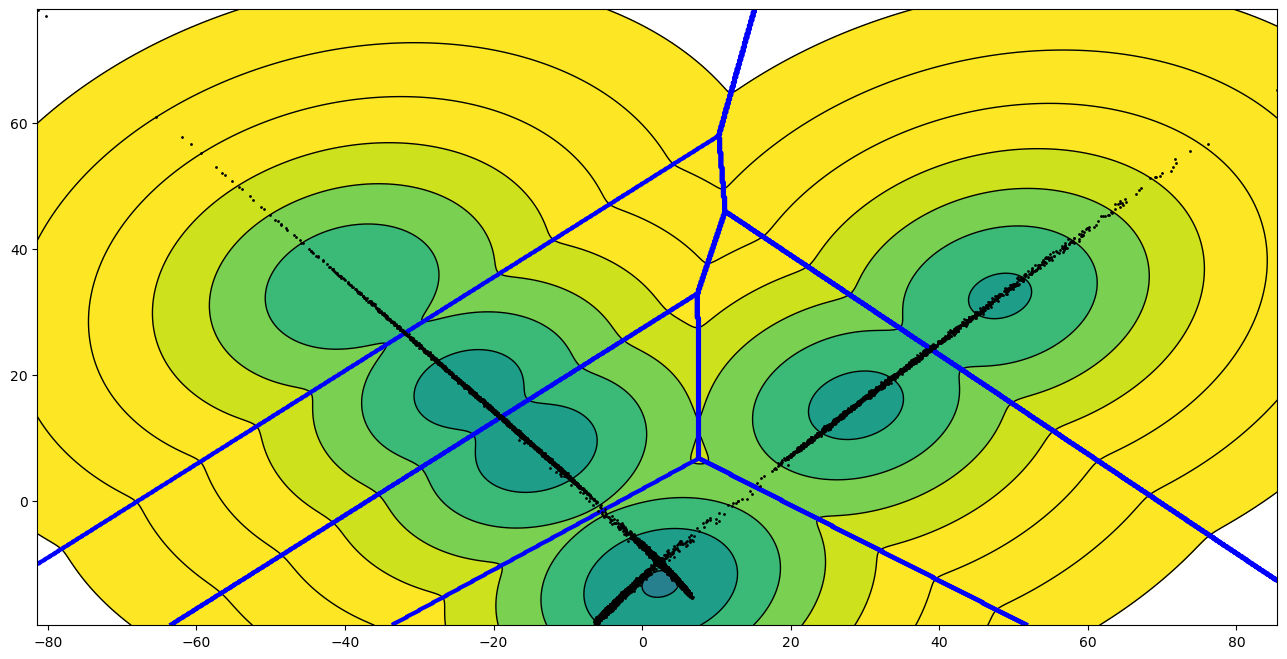

In [39]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42, covariance_type="tied")
gm.fit(scaled_data_2d)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, scaled_data_2d)
plt.show()

In [40]:
combined_labels = pd.concat([df3, df2], ignore_index=True)
assert len(combined_labels) == len(scaled_data)

In [41]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

results = pd.DataFrame({
    'Cluster': clusters,
    'Label': combined_labels.values.ravel()
})

In [42]:
conf_matrix = pd.crosstab(results['Cluster'], results['Label'], rownames=['Cluster'], colnames=['Label'])
print(conf_matrix)

Label      1    2    3    4    5    6
Cluster                              
0        348  331  267  538  562  492
1        451  348  408  356  322  486
2        210  228  137  286  301  215
3        280  298  257  355  394  400
4        202  185  140   87  159  149
5        231  154  197  155  166  202


In [43]:
accuracy_per_label = conf_matrix.max(axis=0) / conf_matrix.sum(axis=0)
print("Accuracy per label:")
print(accuracy_per_label)

Accuracy per label:
Label
1    0.261905
2    0.225389
3    0.290185
4    0.302757
5    0.295168
6    0.253086
dtype: float64


According to the table, the algorithm coped best with 4 (sitting) and worst with 2 (climbing stairs)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, combined_labels, test_size=0.3, random_state=42)

In [46]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

rf_accuracy = rf_clf.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {rf_accuracy: .2f}")

Random Forest Classifier Accuracy:  0.69


In [48]:
svm_clf = SVC(kernel='rbf', gamma='scale', C=1, random_state=42)
svm_clf.fit(X_train, y_train)

svm_accuracy = svm_clf.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy: .2f}")

SVM Accuracy:  0.50


In [49]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.75      0.74       546
           2       0.64      0.64      0.64       425
           3       0.68      0.55      0.61       419
           4       0.71      0.71      0.71       551
           5       0.65      0.76      0.70       548
           6       0.75      0.70      0.72       601

    accuracy                           0.69      3090
   macro avg       0.69      0.69      0.69      3090
weighted avg       0.70      0.69      0.69      3090

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.52      0.55       546
           2       0.51      0.42      0.46       425
           3       0.53      0.35      0.42       419
           4       0.53      0.43      0.47       551
           5       0.40      0.65      0.50       548
           6       0.51      0.56      0.54       601

    accuracy 

RandomForestClassifier achieves the best results.